In [1]:
import sys


sys.path.insert(0, '../../scripts')
import IM_rank_correlations as IMR;
import measure_classification as mc;
import compute_invariance as compute_invariance;
from Measures import map_measures_to_indices;
import numpy as np;
import csv
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
# Load the rules

tables = [];
with open('../../rules_adult_new.csv') as csvfile:
    rule_reader = csv.reader(csvfile)
    for rule in rule_reader:
        tables.append([int(rule[0]), int(rule[2]), int(rule[3]), int(rule[1])])
        
tables = np.array(tables)

In [3]:
tables.shape

(13000, 4)

In [4]:
sum(tables[:,0]>=0)/tables.shape[0]

1.0

(array([1.2486e+04, 2.6400e+02, 1.4000e+02, 3.4000e+01, 2.8000e+01,
        1.2000e+01, 1.2000e+01, 1.2000e+01, 4.0000e+00, 8.0000e+00]),
 array([    0. ,  4326.6,  8653.2, 12979.8, 17306.4, 21633. , 25959.6,
        30286.2, 34612.8, 38939.4, 43266. ]),
 <a list of 10 Patch objects>)

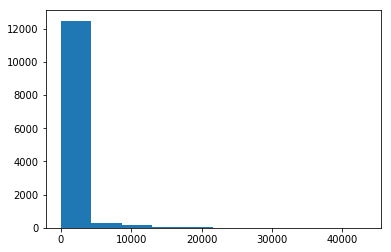

In [5]:
plt.hist(tables[:,0])

(array([9.658e+03, 2.640e+02, 1.400e+02, 3.400e+01, 2.800e+01, 1.200e+01,
        1.200e+01, 1.200e+01, 4.000e+00, 8.000e+00]),
 array([1.00000e+00, 4.32750e+03, 8.65400e+03, 1.29805e+04, 1.73070e+04,
        2.16335e+04, 2.59600e+04, 3.02865e+04, 3.46130e+04, 3.89395e+04,
        4.32660e+04]),
 <a list of 10 Patch objects>)

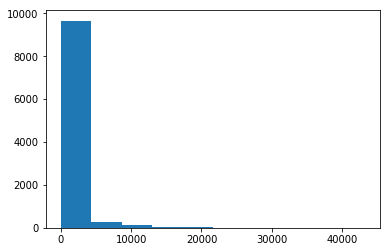

In [6]:
import matplotlib.pyplot as plt
plt.hist(tables[tables[:,0]>0][:,0])
# plt.xlim([0,1000])

In [7]:
# tables.shape

In [8]:
# from sklearn.metrics import pairwise_distances
# metric = 'euclidean'
# for k in range(2,20):
#     n_clusters = k
#     ac = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", affinity=metric)
#     clusters = ac.fit_predict(tables)
#     avg_dist = np.zeros((n_clusters, n_clusters))
    
#     cost = 0
    
#     for c in range(n_clusters):
#         dist_matrix = pairwise_distances(tables[clusters == c], tables[clusters == c], metric=metric)
#         cost += np.triu(dist_matrix, 0).sum()
#         # Search for sparse clusters
#     print(k, cost, [(cname, len(tables[clusters==cname]))
#                         for cname in range(n_clusters)
#                         if tables[clusters==cname,0].mean()/tables[clusters==cname,3].mean() < .2 ])
#     plt.scatter(k, cost)
#     plt.xticks(range(2,20))


(array([9.658e+03, 2.640e+02, 1.400e+02, 3.400e+01, 2.800e+01, 1.200e+01,
        1.200e+01, 1.200e+01, 4.000e+00, 8.000e+00]),
 array([1.00000e+00, 4.32750e+03, 8.65400e+03, 1.29805e+04, 1.73070e+04,
        2.16335e+04, 2.59600e+04, 3.02865e+04, 3.46130e+04, 3.89395e+04,
        4.32660e+04]),
 <a list of 10 Patch objects>)

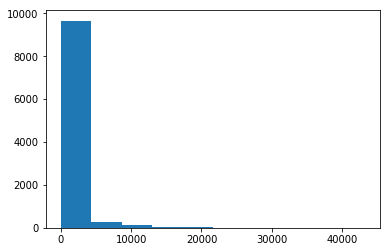

In [9]:
plt.hist(tables[tables[:,0]>0][:,0])

13 640 9.8640625 371.7080834960937
58 1196 0.24832775919732442 1.5696042270220687
90 455 5.454945054945055 314.9556623596184
91 708 2.7062146892655368 108.1622777618181


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


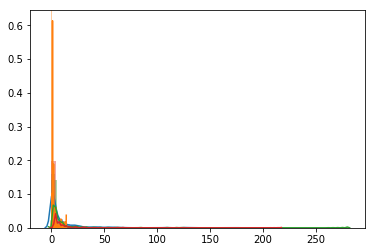

In [10]:
n_clusters = 100;
ac = AgglomerativeClustering(n_clusters=n_clusters)
clusters = ac.fit_predict(tables[:,1:4])
for i in range(n_clusters):
    # Find large enough clusters (>200 rules) with f_11 count very less (sparse)
    if (np.mean(tables[clusters==i][:,0]) < 10) and (len(tables[clusters==i]) > 200):
        print(i, len(tables[clusters==i]), np.mean(tables[clusters==i][:,0]), np.var(tables[clusters==i][:,0]) )
        sns.distplot(tables[clusters==i][:,0], label=str(i))
# plt.show()

In [11]:
idx = 58;
np.mean(tables[clusters==idx][:,0]), tables[clusters==idx]

(0.24832775919732442, array([[    0,    59,     1, 48782],
        [    0,    65,     1, 48776],
        [    0,    67,     1, 48774],
        ...,
        [    0,   206,   182, 48454],
        [    0,   184,   206, 48452],
        [    0,   206,   184, 48452]]))

In [12]:
tabs = tables[clusters==idx]

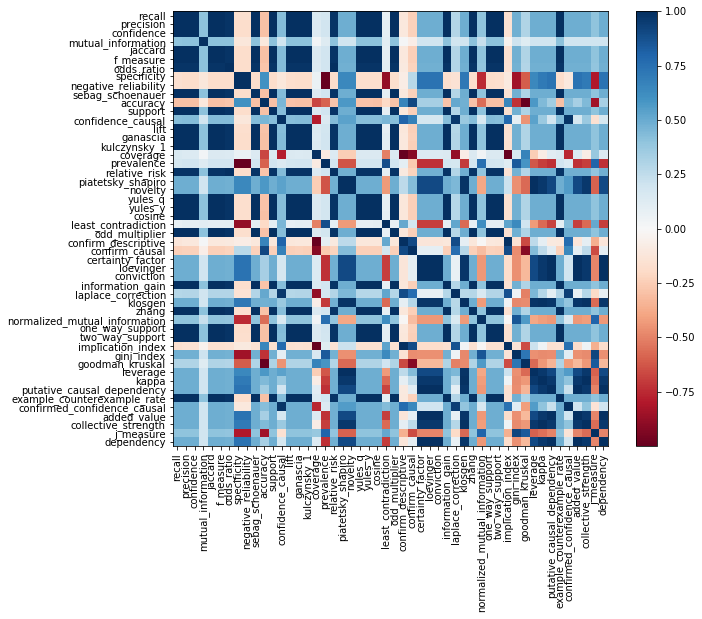

../../scripts/Ranks.py:70: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  self.cluster = hierarchy.linkage(self.distance_uppertriangle, method=method)


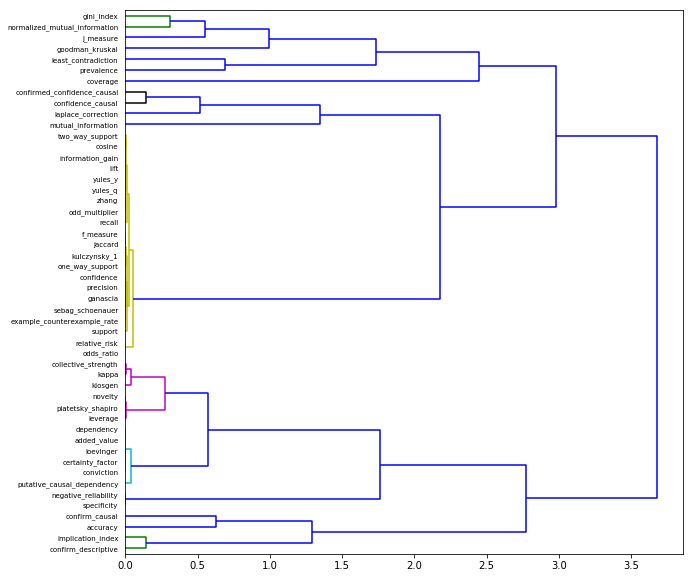

In [13]:
(measures_dict, measures_arr) = map_measures_to_indices();
(ranks_matrix, scores_matrix) = IMR.create_ranks_matrix(tabs, measures_arr);
ranks_matrix.visualize()

In [14]:
# def find_redundant(measures_arr, ranks_matrix):
# #     print(len(measures_arr))
#     for i in range(len(measures_arr)):
#         for j in range(len(measures_arr)):
#             if (i > j):
# #                 print(ranks_matrix)
#                 if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
#                     return(j);

# # remove redundant measures
# while find_redundant(measures_arr, ranks_matrix):
#     i = find_redundant(measures_arr, ranks_matrix);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
# print(len(measures_arr))
# ranks_matrix.show_dendrogram()


In [15]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [16]:
def cluster_set_2():
    rm = IMR.ranks(scores_matrix, measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
#     while find_redundant(ma, rm):
#         i = find_redundant(ma, rm);
#         md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();

../../scripts/Ranks.py:70: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  self.cluster = hierarchy.linkage(self.distance_uppertriangle, method=method)


In [17]:
print_cluster_set(clusters_2, measures_arr_2)

32 [ 0  1  2  3  4  5  6  9 11 12 13 14 15 16 17 18 21 22 23 24 25 31 32 34
 35 36 37 39 40 44 45 48]
['recall' 'precision' 'confidence' 'mutual_information' 'jaccard'
 'f_measure' 'odds_ratio' 'sebag_schoenauer' 'support' 'confidence_causal'
 'lift' 'ganascia' 'kulczynsky_1' 'coverage' 'prevalence' 'relative_risk'
 'yules_q' 'yules_y' 'cosine' 'least_contradiction' 'odd_multiplier'
 'information_gain' 'laplace_correction' 'zhang'
 'normalized_mutual_information' 'one_way_support' 'two_way_support'
 'gini_index' 'goodman_kruskal' 'example_counterexample_rate'
 'confirmed_confidence_causal' 'j_measure']
18 [ 7  8 10 19 20 26 27 28 29 30 33 38 41 42 43 46 47 49]
['specificity' 'negative_reliability' 'accuracy' 'piatetsky_shapiro'
 'novelty' 'confirm_descriptive' 'confirm_causal' 'certainty_factor'
 'loevinger' 'conviction' 'klosgen' 'implication_index' 'leverage' 'kappa'
 'putative_causal_dependency' 'added_value' 'collective_strength'
 'dependency']


In [18]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
#     (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names
        print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([int(np.sum(property_vector[1,:])), int(np.sum(property_vector[0,:]))])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
        print([int(np.sum(property_vector[0,:])),
               int(np.sum(property_vector[1,:])),
               int(np.sum(property_vector[2,:]))]);
#               int(np.sum(property_vector[3,:])),
#               int(np.sum(property_vector[4,:])),
#               int(np.sum(property_vector[5,:]))]);

#         print(support_array[idx,0]);     #prints support for each prop_state

        # property counts of '-1' in new 
        print(property_vector[0,:]);
        
        # property counts of '0' in new
        print(property_vector[1,:]);
        
        # property counts of '1' in new
        print(property_vector[2,:]);

#         print(homo)

return_homogeneity(clusters_2, measures_dict_2);

[32 18]
UNAI_f11
[5, 0, 45]
[4. 1.]
[0. 0.]
[28. 17.]
UNAI_f00
[6, 0, 44]
[6. 0.]
[0. 0.]
[26. 18.]
UNAI_f10
[4, 0, 46]
[3. 1.]
[0. 0.]
[29. 17.]
UNAI_f01
[5, 0, 45]
[2. 3.]
[0. 0.]
[30. 15.]
UNAI
[13, 0, 37]
[10.  3.]
[0. 0.]
[22. 15.]
UNZR_f11
[10, 15, 25]
[7. 3.]
[6. 9.]
[19.  6.]
UNZR_f00
[23, 18, 9]
[20.  3.]
[9. 9.]
[3. 6.]
UNZR_f10
[11, 17, 22]
[5. 6.]
[13.  4.]
[14.  8.]
UNZR_f01
[18, 17, 15]
[13.  5.]
[14.  3.]
[ 5. 10.]
UNZR
[33, 14, 3]
[24.  9.]
[8. 6.]
[0. 3.]
